In [6]:
# Import modules
import pandas as pd
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# Set up to show the figures in the notebook
init_notebook_mode(connected=True) 

I am looking at some data of US agriculture exports and I am specifically interested in comparing the total for each state in this example. I will start off by loading a csv file of the data into a dataframe.

In [5]:
# Load data into pandas dataframe
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [19]:
sns.set(rc={'figure.figsize':(15,9)})

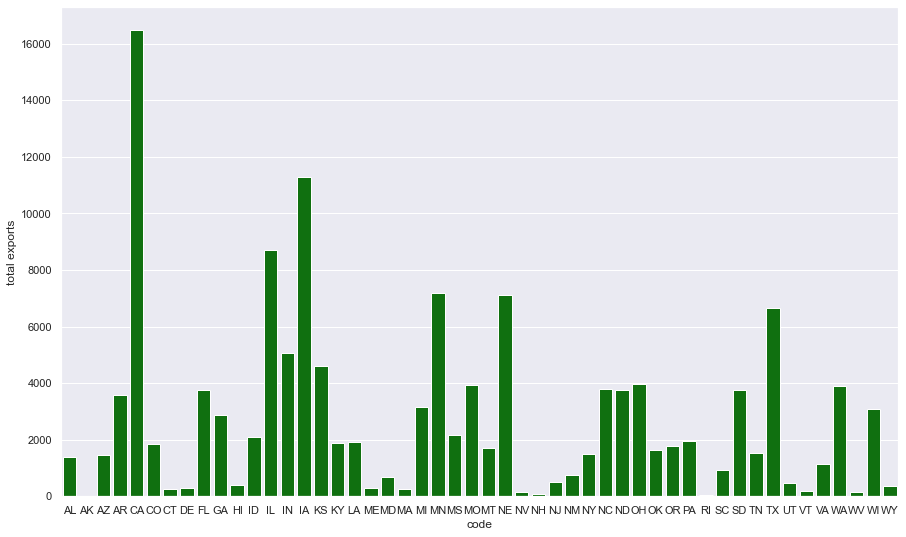

In [35]:
sns.barplot(x='code', y='total exports', data=df, color = 'green')

This barchart clearly indicates which states have the highest exports but it would be interesting to see this geographically. I will use plotly show the data plotted on a map. It is very detailed, using very complicated methods and often has strange syntax such as nested dictionaries.

We need to use the **plotly.graph_objects.Figure()** method which takes 4 arguments:
* data - The ‘data’ property is a tuple of trace instances that may be specified as list or tuple of dicts of string/value properties 
* layout - A dict of string/value properties that will be passed to the Layout constructor
* frame - A list or tuple of dicts of string/value properties that will be passed to the Frame constructor
* skip_invalid - If False (default) invalid properties in the figure specification will result in a ValueError

Here is a link the the documentation: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html

**Note:** It is probably easier to find a pre-existing example and edit it than it is to go through and understand the documentation.

In [44]:
# Dictionary of properties to be passed to the data argument of Figure()
data = dict(type='choropleth',
            colorscale = 'Greens',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 1)),
            colorbar = {'title':"Total Exports"}
            )

In [49]:
# Dictionary of properties to be passed to the layout argument of Figure()
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(125,165,235)')
             )

In [51]:
# Create a figure instance taking the data and layout dictionaries as arguments
usa_map = go.Figure(data = [data],layout = layout)

In [53]:
# Use iplot to plot the map within the Jupyter notebook
iplot(usa_map)